## Background

The purpose of this tutorial is to use your ability to code to help you understand probability and statistics.

### Probability

Probability is the study of random events - the study of how likely it is that some event will happen.

### Statistics

Statistics is the discipline that uses data to support claims about populations. Most statistical analysis is based on probability, which is why these pieces are usually presented together.

#### Data Collection 

Data collection is the process of gathering data to answer relevant questions and evaluate outcomes.

#### Descriptive Statistics 

Descriptive statistics refers to statistics that summarize your data concisely and evaluate different ways to visualize data.

#### Exploratory Data Analysis

During the process of exploratory data analysis, we look for patterns, differences, and other features that address the questions we are interested in. At the same time we will check for inconsistencies and identify limitations.

#### Hypothesis Testing 

When we evaluate a possible cause-and-effect relationship, like a difference between two groups, we will evaluate whether the effect is real or whether it might have happened by chance.

#### Estimation 

Estimation is what allows us to use data from a sample to estimate characteristics of the general population.

In [3]:
from IPython.display import display, Math, Latex

## Descriptive Statistics

Descriptive Statistics are the basic operations used to gain insights on a set of data.

### Mean 

An “average” is one of many summary statistics you might choose to describe the typical value or the central tendency of a sample.

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/mean.png?raw=true "Logo Title Text 1")

In Python, the mean would look like this: 

In [4]:
def mean(t):
    #write function for mean below

# to check your function run it with the following list: [1,4,3,2,6,4,4,3,2,6], the answer should be the same as below   

SyntaxError: unexpected EOF while parsing (<ipython-input-4-74f6352abac2>, line 4)

Alternatively, you can use built-in functions from the numpy module: 

In [5]:
import numpy as np
np.mean([1,4,3,2,6,4,4,3,2,6])

3.5

### Variance

In the same way that the mean is intended to describe the central tendency, variance is intended to describe the <b>spread</b>. 

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/variance.png?raw=true "Logo Title Text 1")

The x<sub>i</sub> - &mu; is called the "deviation from the mean", making the variance the squared deviation multiplied by 1 over the number of samples. This is why the square root of the variance, &sigma;, is called the <b>standard deviation</b>.

Using the mean function we created above, we'll write up a function that calculates the variance: 

In [6]:
def var(t, mu):
    #write the function for variance below
    
# to check your function run it with the following list: [1,3,3,6,3,2,7,5,9,1], the answer should be the same as below 

SyntaxError: unexpected EOF while parsing (<ipython-input-6-9ce314eb15cb>, line 4)

Once again, you can use built in functions from numpy instead:

In [7]:
print(np.var([1,3,3,6,3,2,7,5,9,1]))

6.4


# Challenge



 - Given the following array, what is the mean (call this `mean1`)?  What is the variance (call this `var1`)?

``` python
[1,1,1,1,1,1,1]
```

 - Given the following array, what is the mean (call this `mean2`)?  What is the variance (call this `var2`)?

``` python
[1,1,1,1,1,1,2]
```

 - Given the following array which contains an outlier, what is the mean (call this `mean3`)?  What is the variance (call this `var3`)?  Notice how the mean and variance vary from challenge problem 2. 


``` python
[1,1,1,1,1,1,20]
```

### Distributions

Summary statistics are concise, but dangerous, because they obscure the data. An alternative is to look at the <b>distribution</b> of the data, which describes the summary of possible outcomes. That is, it provides the probability of each possible value occuring. 

Probability distributions are derived for both continous and discrete variables. A continous variable can take on any value - an infinite number of possible values. Example: GDP, time. On the other hand discrete variables can only take on a finite number of values. Eg. Indians over 25 with college degrees. 


#### Histograms

The most common representation of a distribution is a histogram, which is a graph that shows the frequency or probability of each value.

Let's say we have the following list: 

In [8]:
t = [1,2,2,3,1,2,3,2,1,3,3,3,3]

To get the frequencies, we can represent this with a dictionary:

In [9]:
hist = {}
for x in t:
    hist[x] = hist.get(x,0) + 1
print(hist)

#alternatively we can use the built-in items() function which returns a list of tuples
hist.items()

{1: 3, 2: 4, 3: 6}


dict_items([(1, 3), (2, 4), (3, 6)])

Now, if we want to convert these frequencies to probabilities, we divide each frequency by n, where n is the size of our original list. This process is called <b>normalization</b>.

In [10]:
n = float(len(t))
pmf = {}
for x, freq in hist.items():
    pmf[x] = freq / n
print(pmf)

{1: 0.23076923076923078, 2: 0.3076923076923077, 3: 0.46153846153846156}


This normalized histogram is called a PMF, “probability mass function”, which is a function that maps values to probabilities.

#### Mode

The most common value in a distribution is called the <b>mode</b>.

#### Shape

The shape just refers to the shape the histogram data forms. Typically, we look for asymetry, or a lack there of.

#### Outliers

Outliers are values that are far from the central tendency. Outliers might be caused by errors in collecting or processing the data, or they might be correct but unusual measurements. It is always a good idea to check for outliers, and sometimes it is useful and appropriate to discard them.

## Cumulative Distribution Functions (CDF)

### Percentiles

You have probably heard of percentiles. The percentile rank is the fraction of people who scored lower than you (or the same). So if you are “in the 90th percentile,” you did as well as or better than 90% of the people who took the exam. A CDF is for continous random variables only. 

In [11]:
def percentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return(percentile_rank)

print(percentileRank([1,42,53,23,12,3,35,2], 17.5))

50.0


Alternatively, we can use the `scipy` module to retrieve the percentile rank! 

In [12]:
from scipy import stats
print(stats.percentileofscore([1,42,53,23,12,3,35,2], 17.5))

50.0


Both of these output the 50th percentile since 17.5 is the median!

Now, what if we want the reverse? So instead of what percentile a value is, we want to know what value is at a given percentile. In other words, now we want the inputs and outputs to be switched. Luckily, this is available with `numpy`:

In [13]:
import numpy as np
print(np.percentile([1,42,53,23,12,3,35,2], 50))

17.5


This code returns the 50th percentile, e.g median, `17.5`.

### CDFs

The Cumulative Distribution Function (CDF) is the function that maps values to their percentile rank in a distribution.

The following function should look familiar - it's almost the same as percentileRank, except that the result is in a probability in the range 0–1 rather than a percentile rank in the range 0–100.

In [14]:
def cdf(t, x):
    count = 0.0
    for value in t:
        if value <= x:
            count += 1.0
    prob = count / len(t)
    return(prob)

### Interquartile Range

Once you have computed a CDF, it's easy to compute other summary statistics. The median is just the 50th percentile. The 25th and 75th percentiles are often used to check whether a distribution is symmetric, and their difference, which is called the interquartile range, measures the spread.

## Sampling Distributions

The distributions we have used so far are called empirical distributions because they are based on empirical observations, which are necessarily finite samples. The alternative is a continuous distribution, which is characterized by a CDF that is a continuous function (as opposed to a step function).

### Normal Distribution

The normal distribution is a continuous distribution or a function that can take on values anywhere on the real line. The normal distribution is parameterized by two parameters: the mean of the distribution μ and the variance σ2:

$$y = \frac{1}{{\sqrt {2\pi\sigma^2 } }}e^{-((x-\mu)^2/(2\sigma^2))}$$

The normal distribution function will be used extensively when we get to hypothesis testing. 

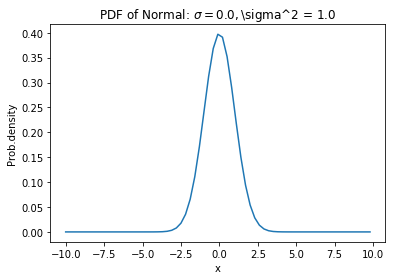

In [16]:
#below is the code for the standard normal distribution
import matplotlib.pyplot as plt
mean = 0
variance = 1

x = np.arange(-10,10,0.3)
y = stats.norm.pdf(x,mean,variance)
plt.plot(x,y)
plt.title("PDF of Normal: $\sigma = %.1f, $\sigma^2 = %.1f" % (mean,variance))
plt.xlabel('x')
plt.ylabel("Prob.density")
plt.show()

In [17]:
from scipy.special import erf

def NormalCdf(x):
    return (erf(x / root2) + 1) / 2

def NormalCdf(x, mu=0, sigma=1):
    return(StandardNormalCdf(float(x - mu) / sigma))

### Exponential Distribution 

Exponential distributions come up when we look at a series of events and measure the times between events, which are called interarrival times. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

$$y = \lambda\ e^{-\lambda x}$$

Here, &lambda; determines the shape of the distribution. The mean of an exponential distribution is 1/&lambda;, whereas the median is usually ln(2)/&lambda;. This results in a distribution that looks like:



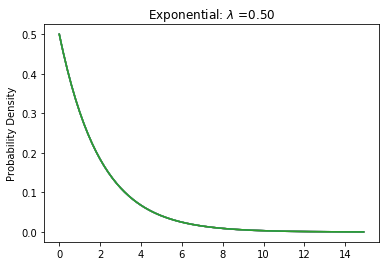

In [25]:
lambda_ = 0.5
x = np.arange(0,15,0.1)
y = lambda_* np.exp(-lambda_*x)
plt.plot(x,y)
plt.title("Exponential: $\lambda$ =%.2f" % lambda_)
plt.ylabel("Probability Density")
plt.xlabel
plt.show()

# Challenge

Write a function `exp_cdf()` that takes x and a series of events as input and returns the probability of that x occuring.

### Pareto Distribution 

The Pareto Distribution is often used to describe phenomena in the natural and social sciences including sizes of cities and towns, sand particles and meteorites, forest fires and earthquakes.

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/pareto%20cdf.png?raw=true "Logo Title Text 1")

Here, x<sub>m</sub> and &alpha; determine the location and shape of the distribution. Specifically x<sub>m</sub> is the minimum possible value. This ends up looking something like this: 

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/pareto%20cdf%20plot.png?raw=true "Logo Title Text 1")


# Challenge

Write a function `pareto()` that takes the x variable and an alpha value as input. This function should return the percentile rank of inputted x value.

### Poisson Distribution

The Poisson distribution can be applied to systems with a large number of possible events, each of which is rare. So, a Poisson distribution represents the number of events occurring in a fixed time interval with a rate parameters λ. λ tells you the rate at which the number of events occur.  The average and variance is λ.

A discrete random variable `X` is said to have a Poisson distribution with parameter &lambda; > 0, if, for k = 0, 1, 2,..., the probability mass function of X  is given by:

$$P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}$$


The positive real number &lambda; is equal to the expected value of X and its variance, so &lambda; = E(X) = Var(X).

To calculate poisson distribution we need two variables:

1. Poisson random variable (x): Poisson Random Variable is equal to the overall REMAINING LIMIT that needs to be reached

2. Average rate of success(rate_of_success): 
 

#### Code

Scipy is a python library that is used for Analytics, Scientific Computing, and Technical Computing. Using the `stats.poisson` module we can easily compute poisson distribution of a specific problem.

Using scipy, we can calculate the poisson distribution as follows: 


In [ ]:
proabability_reached = float(1-scipy.stats.distributions.poisson.cdf(poisson random variable-1, rate_of_success)) * 100

NumPy can also be used to generate a random Poisson distribution. For example,

In [35]:
import numpy as np
# This generates a poisson distribution of size 100 with lambda value 1
print(np.random.poisson(1,100))

[2 1 1 1 0 1 1 1 0 0 1 1 2 0 0 1 0 2 1 4 1 0 1 1 1 0 0 0 0 1 1 0 1 0 3 0 0
 0 0 1 0 3 0 0 0 1 2 1 2 1 0 0 3 3 1 1 2 2 1 0 1 1 0 0 1 3 3 0 2 0 2 0 0 0
 2 1 3 0 2 2 0 1 1 1 2 0 0 0 2 0 0 1 1 0 1 2 2 1 0 1]


#### Challenge

Create a function `def poisson_dist()` that meets the following requirements:

1. Generate a random poisson distribution of size 1000 and lambda 10 using above method.
2. Returns the distribution

In [ ]:
def poisson_dist():
    #write function below

### Operations on Distributions

#### Skewness

Skewness is a statistic that measures the asymmetry of a distribution. Given a sequence of values, x<sub>i</sub>, the sample skewness is

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/skewness.png?raw=true "Logo Title Text 1")

You might recognize m<sub>2</sub> as the mean squared deviation (or variance). m<sub>3</sub> is the mean cubed deviation.

Negative skewness indicates that a distribution “skews left". It extends farther to the left than the right. Positive skewness indicates that a distribution skews right.

To find this value, you can use `scipy`:

In [18]:
import scipy
print(scipy.stats.skew([1,3,3,6,3,2,7,5,9,1]))

0.592927061281571


Which gets us a measure of `0.592927061281571`, meaning it's skewed to the right.

Because outliers can have a disproportionate effect on g<sub>1</sub>, another way to evaluate the asymmetry of a distribution is to look at the relationship between the mean and median. Extreme values have more effect on the mean than the median, so in a distribution that skews left, the mean is less than the median.

Take the example from above:

```
[1,3,3,6,3,2,7,5,9,1]
```

The median of this list is `3`, whereas the mean is `4`. With these two values, you can confirm that it skews to the right. 

# Challenge

Recall the list that we calculated percentiles on, `[1,42,53,23,12,3,35,2]`. Using both methodologies overviewed above, prove that this list of values is `right` skewed. 

In [11]:
import scipy.stats as sc
#import skew_module.skew as sk

dis = [1,3,3,6,3,2,7,5,9,1]

#### Pearson’s Median Skewness Coefficient

Pearson’s median skewness coefficient is an alternative measure of skewness that explicitly captures the relationship between the mean, &mu;, and the median, &mu;<sub>1/2</sub>. It's particularly useful because it's robust, meaning it is <b>not</b> sensitive to outliers.

The equation is as follows: 

In [ ]:
P = (3 * (X - Med))/s

where X is the mean, Med is the median, and s is the standard deviation. 

For `[1,3,3,6,3,2,7,5,9,1]`, the mean is 21, the median is 17.5, and the standard deviation is `18.808`. If we plug these values in, we can a pearson median coefficient of `0.5582781958205234`, meaning it's right skewed.

# Challenge

Compute the pearson median coefficient for `[1,42,53,23,12,3,35,2]` in Python. Your function should be named `pearson_coeff` and should output a float indicated the skewness.


In [11]:
import numpy as np

def pearson_coeff(given):
  x = np.mean(given)
  med = np.median(given)
  s = np.std(given)
  # Pearson Median Skewness Coefficient
  p = (3*(x-med))/s
  return(p)

#### Standard Error of Mean

In sampling distributions, an estimate is not always equal to its expected value. To determine what the uncertainty of this is, we determine the standard deviation of the distribution of the estimator.

Given the mean estimator $\overline X$ for the sample $X_1, \ldots, X_n$., the Central Limit Theorem tells us that as $n$ increases, the estimate of $\overline X$ starts to resemble the normal distribution:

$$ \overline X \sim N\left(\mu, \frac{\sigma^2}{n} \right) $$

The **z-score** measures the number of standard deviations the observation is above the mean.  For $\overline X$, the z-score is distributed as a standard normal with a mean of zero and standard deviation of one.

$$ z = \frac{\overline X - \mu}{\sigma / \sqrt{n}} $$

#### Student T Distribution

Since $\sigma$ is often unknown, we use the square root of the estimate for the variance $\sigma^2$ to get$\hat \sigma$. This makes the distribution of the z score a Student T distribution instead of a normal one.

$$ z = \frac{\overline X - \mu}{\hat\sigma / \sqrt{n}} $$

The pdf for this distribution is as follows: 

$$ p(x) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{x^2}{\nu} \right)^{\!-\frac{\nu+1}{2}} \,$$

where the mean is $\mathbb{E}[X] = 0$ and the variance is $\mbox{Var}[X] = \frac{\nu}{\nu-2}$. It's important to note, however, that as $\nu \to \infty$ (or $n \to \infty$), the distribution approaches the standard normal distribution

$$ \overline X \longrightarrow N\left(\mu, \frac{\sigma^2}{n} \right)\, $$

This results in a standard error of:

$$ s = \frac{\sigma}{\sqrt{n}}\, $$

In the example below, we'll take the mean estimate of an exponential random variable. First we initialize n to 1,000 and generate the exponential distribution using `scipy`.

In [ ]:
N = 1000
expon = scipy.stats.expon(loc=-1.)

In [ ]:
sample_sizes = (None, 10, 100, 1000)
mean, var = expon.stats("mv")
std = np.sqrt(var)

for k, sample_size in enumerate(sample_sizes):
    plt.subplot(2,2,k+1)
    if sample_size:
        rvs = expon.rvs(size=[sample_size, N]).mean(axis=0)
        dist = sp.stats.norm(loc=0., scale=1./np.sqrt(sample_size))
        plot_hist_dist(
            rvs,
            dist,
            mean=mean,
            confidence_interval=[mean - np.sqrt(var / sample_size), mean + np.sqrt(var / sample_size)],
            title='mean estimate with {:d}'.format(sample_size),
        )
    else:
        plot_hist_dist(expon.rvs(size=N), expon, title='exponential')

plt.tight_layout()

## Standard Error of Variance Estimate

For normally distributed data, the variance estimator forms a chi-squared distribution. The $\chi^2$ distribution with $n$ degrees of freedom is the distribution given by the sum of $n$ independent standard normals squared, or: 

$$ \chi^2(n) \sim \sum_{k=1}^n Z_k^2\,. $$

In [ ]:
N = 1000
norm = scipy.stats.norm()
sample_sizes = (None, 10, 100, 1000)

for k, sample_size in enumerate(sample_sizes):
    plt.subplot(2,2,k+1)
    if sample_size:
        dist = scipy.stats.chi2(df=sample_size, scale=1./sample_size)
        mean, var = dist.stats("mv")        
        plot_hist_dist(
            sp.stats.norm().rvs(size=[sample_size, N]).var(axis=0),
            dist,
            mean=mean,
            confidence_interval=[mean - np.sqrt(var), mean + np.sqrt(var)],
            title='var est with {:d}'.format(sample_size),
        )
    else:
        plot_hist_dist(norm.rvs(size=N), norm, title='normal')
plt.tight_layout()

## Probability

Probability is a real value between 0 and 1 that is intended to be a quantitative measure corresponding to the qualitative notion that some things are more likely than others.

The “things” we assign probabilities to are <b>called events</b>. If E represents an event, then P(E) represents the probability that E will occur. A situation where E might or might not happen is called a trial.

### Probability Rules

Generally speaking, P(A and B) = P(A) P(B), but this is not always true. 

If two events are mutually exclusive, that means that only one of them can happen, so the conditional probabilities are 0: P(A|B) = P(B|A) = 0. In this case it is easy to compute the probability of either event:
P(A or B) = P(A) + P(B)

### Binomial Distribution 

If I roll 100 dice, the chance of getting all sixes is (1/6)<sup>100</sup>. And the chance of getting no sixes is (5/6)<sup>100</sup>. Those cases are easy, but more generally, we might like to know the chance of getting k sixes, for all values of k from 0 to 100. The answer is the binomial distribution, which has this PMF:

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/binomial%20pmf.png?raw=true "Logo Title Text 1")

where n is the number of trials, p is the probability of success, and k is the number of successes. The binomial coefficient is pronounced “n choose k”, and it can be computed
recursively like this:

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/binomial%20coeff.png?raw=true "Logo Title Text 1")

In Python, this looks like: 

In [ ]:
def Binom(n, k, d={}):
    if k == 0:
        return(1)
    if n == 0:
        return(0)
    try:
        return(d[n, k])
    except KeyError:
        res = Binom(n-1, k) + Binom(n-1, k-1)
        d[n, k] = res
        return(res)

### Bayes's Theorem

Bayes’s theorem is a relationship between the conditional probabilities of two events. A conditional probability, often written P(A|B) is the probability that Event A will occur given that we know that Event B has occurred. It's represented as follows:

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/bayes.png?raw=true "Logo Title Text 1")

Bayes theorem is what allows us to go from a sampling distribution and a prior distribution to a posterior distribution. 

#### What is a Sampling Distribution?

A sampling distribution is the probability of seeing a given data point, given our parameters (&theta;). This is written as p(X|&theta;). For example, we might have data on 1,000 coin flips, where 1 indicates a head.

In python, this might look like: 

In [24]:
import numpy as np
data_coin_flips = np.random.randint(2, size=1000)
print(np.mean(data_coin_flips))

0.495


As we said in the previous section, a sampling distribution allows us to specify how we think these data were generated. For our coin flips, we can think of our data as being generated from a Bernoulli Distribution. 

Therefore, we can create samples from this distribution like this:

In [31]:
bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
print(np.mean(bernoulli_flips))

0.49


Now that we have defined how we believe our data were generated, we can calculate the probability of seeing our data given our parameters. Since we have selected a Bernoulli distribution, we only have one parameter, p. 

We can use the PMF of the Bernoulli distribution to get our desired probability for a single coin flip. Recall that the PMF takes a single observed data point and then given the parameters (p in our case) returns the probablility of seeing that data point given those parameters. 

For a Bernoulli distribution it is simple: if the data point is a 1, the PMF returns p. If the data point is a 0, it returns (1-p). We could write a quick function to do this:

In [ ]:
def bern_pmf(x, p):
    if x == 1:
        return(p)
    elif x == 0:
        return(1 – p)
    else:
        return("Value Not in Support of Distribution")

We can now use this function to get the probability of a data point give our parameters. You probably see that with p = .5 this function always returns .5

In [ ]:
print(bern_pmf(1, .5))
print(bern_pmf(0, .5))

More simply, we can also use the built-in methods from scipy:

In [34]:
import scipy.stats as st
print(st.bernoulli.pmf(1, .3))
print(st.bernoulli.pmf(0, .3))

0.3
0.7


## Estimation 

Up until now we have used the symbol &mu; for both the sample mean and the mean parameter, but now we will distinguish them, using x&#772; for the sample mean. Previously, we've just assumed that x&#772; = &mu;, but now we will go through the actual process of estimating &mu;. This process is called estimation, and the statistic we used (the sample mean) is called an estimator.

### Outliers

Using the sample mean to estimate &mu; is fairly intuitive, but suppose we introduce outliers. One option is to identify and discard outliers, then compute the sample mean of the rest. Another option is to use the median as an estimator.

### Mean Squared Error

If there are no outliers, the sample mean minimizes the mean squared error (MSE). If we iterate through a dataset, and each time compute the error x&#772; - &mu;, the sample mean minimizes: 

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/mse.png?raw=true "Logo Title Text 1")

# Challenge 

Write a function `mse()` that takes two lists of numberical datapoints as parameters. The first list should be the set of points of a <i>sample</i> set, while the second should be the set of points from the origin distribution. 

## Hypothesis Testing

A statistical hypothesis is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. The underlying logic is similar to a proof by contradiction. To prove a mathematical statement, A, you assume temporarily that A is false. If that assumption leads to a contradiction, you conclude that A must actually be true.

Similarly, to test a hypothesis like, “This effect is real,” we assume, temporarily, that is is not. That’s the <b>null hypothesis</b>, which is what you typically want to disprove. Based on that assumption, we compute the probability of the apparent effect. That’s the <b>p-value</b>. If the p-value is low enough, we conclude that the null hypothesis is unlikely to
be true.

### Z-Values, P-Values & Tables

These are associated with standard normal distributions. Z-values are a measure of how many standard deviations away from mean is the observed value. P-values are the probabilities, which you can retrieve from its associated z-value in a [z-table](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf). 

We've already reviewed how to retrieve the p-value, but how do we get the z-value? With the following formula:

![alt text](https://github.com/ByteAcademyCo/stats-programmers/blob/master/z%20value.png?raw=true "Logo Title Text 1")

where x is your data point, &mu; is the mean and &sigma; is the standard deviation. 

### Central Limit Theorem

The central limit theorem allows us to understand the behavior of estimates across repeated sampling and conclude if a result from a given sample can be declared to be “statistically significant".

The central limit theorem tells us exactly what the shape of the distribution of means will be when we draw repeated samples from a given population.  Specifically, as the sample sizes get larger, the distribution of means calculated from repeated sampling will approach normality. 

Let's take a look at an example: Here, we have data of 1000 students of 10th standard with their total marks. Let's take a look at the frequency distribution of marks: 

![alt text](https://github.com/ByteAcademyCo/stats-programmers/blob/master/clt-hist.png?raw=true "Logo Title Text 1")

This is clearly an unnatural distribution. So what can we do? 

Let's take a sample of 40 students from this data. That makes for 25 total samples we can take (1000/40 = 25). The actual mean is 48.4, but it's very unlikely that every sample of 40 will have this same mean. 

If we take a large number of samples and compute the means and then make a probability histogram on these means, we'll get something similar to:

![alt text](https://github.com/ByteAcademyCo/stats-programmers/blob/master/clt-samp.png?raw=true "Logo Title Text 1")

You can see that distribution resembles a normally distributed histogram. 

### Significance Level

Significance Tests allow us to see whether there is a significant relationship between variables. It gives us an idea of whether something is likely or unlikely to happen by chance. 

### Steps

The initial step to hypothesis testing is to actually set up the Hypothesis, both the NULL and Alternate.  

Next, you set the criteria for decision. To set the criteria for a decision, we state the level of significance for a test. Based on the level of significance, we make a decision to accept the Null or Alternate hypothesis.

The third step is to compute the random chance of probability. Higher probability has higher likelihood and enough evidence to accept the Null hypothesis.

Lastly, you make a decision. Here, we compare p value with predefined significance level and if it is less than significance level, we reject Null hypothesis, else we accept it.

### Example

Blood glucose levels for obese patients have a mean of 100 with a standard deviation of 15. A researcher thinks that a diet high in raw cornstarch will have a positive effect on blood glucose levels. A sample of 36 patients who have tried the raw cornstarch diet have a mean glucose level of 108. Test the hypothesis that the raw cornstarch had an effect or not.

#### Hypothesis

First, we have to state the hypotheses. We set our NULL Hypothesis to be the glucose variable = 100 since that's the known fact. The alternative is that the glucose variable is greater than 100. 

#### Significance Level

Unless specified, we typically set the significance level to 5%, or `0.05`. Now, if we figure out the corresponding z-value from the [z-table](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf), we'll see that it corresponds to `1.645`. This is now the z-score cut off for significance level, meaning the area to the right (or z-scores higher than 1.645) is the rejection hypothesis space. 

#### Computation

Now, we can compute the random chance probability using z scores and the z-table. Recall the formula from earlier, z = (x - &mu;)/ &sigma;. Now, before we go into computing, let's overview the difference between standard deviation of the mean and standard deviation of the distribution. 

When we want to gain a sense the precision of the mean, we calculate what is called the <i>sample distribution of the mean</i>. Assuming statistical independence, the standard deviation of the mean is related to the standard deviation of the distribution with the formula &sigma;<sub>mean</sub> = &sigma / &radic;N. 

With that knowledge in mind, we've been given the standard deviation of the distribution, but we need the standard deviation of the mean instead. So before we begin calculating the z value, we plug in the values for the formula above. Then we get &sigma;<sub>mean</sub> = 15 / &radic;36, or `2.5`.

Now we have all the needed information to compute the z value:

#### Hypotheses 

Awesome! Now we can get the p-value from the z-value above. We see that it corresponds to `.9993`, but we have to remember to subtract this number from 1, making our p-value `0.0007`. Recall that a p-value below 0.05 is grounds for rejecting the null hypothesis. There, we do just that and conclude that there <i>is</i> an effect from the raw starch.

# Challenge

1.  You have a coin and you would like to check whether it is fair or not.  Let `theta` be the probability of heads.  We have two hypothesis.  The null hypothesis is that the could is fair.  What value would we define `theta` to be? -  call this `nulltheta`.  The alternative hypthesis is then the coin is not fair.  (Thus, the alternative hypothetis is not equal to `nulltheta`.)

2.  Again let our significance level be 5% or 0.05.  In this case, we are looking at two -tails.  Using the z-table from above, calculate the positive z-value.- call this `zval`.  This means we will accept the null hypothesis for z-scores between -`zval` to +`zval`.  We will accept the alternative hypthosis for z-scores from -infinity to -`zval` or +`zval` to infinity.  

3.  To test the null hypthosis and alternative hypothesis, we toss a coin 100 times and record the number of heads.  Calculate the mean. - call this `mean`.  Calculate the the standard deviation.- call this `standev`. (hint: this is a binomial distribution.)

4.  Let's look at `coin1`. Let's say we toss one coin, `coin1`, 100 times and we get 45 heads. Calculate this z - score. - call it `zs1`. Does this accept the null hypotheis or the alternative hypothesis.  Label  `coin1` as 'null' or 'alternative'.  

5.  Let's look at `coin2`. Let's say we toss another coin, `coin2`, 100 times and we get 61 heads. Calculate this z - value. - call it `zs2`.  Does this accept the null hypotheis or the alternative hypothesis.  Label  `coin2` as 'null' or 'alternative'.  

## Correlation

Now, we'll look at relationships between variables. <b>Correlation</b> is a description of the relationship between two variables.

### Covariance

Covariance is a measure of the tendency of two variables to vary together. If we have two series, X and Y, their deviations from the mean are

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/covariance.png?raw=true "Logo Title Text 1")

where &mu;<sub>X</sub> is the mean of X and &mu;<sub>Y</sub> is the mean of Y. If X and Y vary together, their deviations tend to have the same sign. If we multiply them together, the product is positive when the deviations have the same sign and negative when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.

Therefore, covariance is the mean of these two products:

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/cov%20final.png?raw=true "Logo Title Text 1")

Note that n is the length of the two series, so they have to be the same length.

In [ ]:
def Cov(xs, ys, mux=None, muy=None):
    """Computes Cov(X, Y).

    Args:
        xs: sequence of values
        ys: sequence of values
        mux: optional float mean of xs
        muy: optional float mean of ys

    Returns:
        Cov(X, Y)
    """
    if mux is None:
        mux = thinkstats.Mean(xs)
    if muy is None:
        muy = thinkstats.Mean(ys)

    total = 0.0
    for x, y in zip(xs, ys):
        total += (x-mux) * (y-muy)

    return(total / len(xs))

### Correlation

One solution to this problem is to divide the deviations by &sigma;, which yields standard scores, and compute the product of standard scores.

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/pearson%20coeff.png?raw=true "Logo Title Text 1")

Pearson’s correlation is always between -1 and +1. The magnitude indicates the strength of the correlation. If p = 1 the variables are perfectly correlated. The same is true if p = -1. It means that the variables are negatively correlated.

It's important to note that Pearson's correlation only measures <b>linear</b> relationships. 

Using the mean, variances, and covariance methods above, we can write a function that calculates the correlation. 


In [1]:
import math

def Corr(xs, ys):
    xbar = Mean(xs)
    varx = Var(xs)
    ybar = Mean(ys)
    vary = Var(ys)

    corr = Cov(xs, ys, xbar, ybar) / math.sqrt(varx * vary)
    return(corr)

### Confidence Intervals

The formal meaning of a confidence interval is that 95% of the confidence intervals should, in the long run, contain the true population parameter. Mathematically, this is defined as $z$-$\sigma$  or $z$-standard-deviation **confidence interval** (where $z \ge 0$) to be the interval

$$ [\overline X - zs, \overline X + zs] \,.$$

Assuming the mean estimate is normally distributed, then we can use the statistics of the normal distribution to compute the probability that the mean estimate falls within the $z$-$\sigma$ confidence interval.  If $n(x\mid\mu,\sigma)$ is the normal pdf with mean $\mu$ and standard deviation $\sigma$, then the probability the mean falls within the $z$-$\sigma$ confidence interval is

$$ \int_{\overline X - zs}^{\overline X + zs} n(x \mid \overline X, s)dx = \int_{- z}^{z} n(x \mid 0, 1)dx = N(z) - N(-z) $$

where $N$ is the cumulative normal distribution.  We usually choose $z$ to be 2, indicating the ~95% confidence interval, or 3, indicating the ~99% confidence interval. 

In [ ]:
N = 1000

norm = scipy.stats.norm()

zs = (1, 2, 2.5, 3)

for k, z in enumerate(zs):
    plt.subplot(2,2,k+1)
    plot_hist_dist(norm.rvs(size=N), norm)
    plt.plot([-z, -z], [0, norm.pdf(-z)], 'r', label='CI')
    plt.plot([z, z], [0, norm.pdf(z)], 'r')
    prob = norm.cdf(z) - norm.cdf(-z)
    plt.title('{} sigma CI: {:.4f}'.format(z, prob))
    plt.legend()

plt.tight_layout()

plt.figure()
z=np.arange(0, 3., .1-1e-9)
plt.plot(z, norm.cdf(z) - norm.cdf(-z))
plt.xlabel('z score')
plt.ylabel('probability captured in CI')